In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)

default_df = pd.read_csv("../datasets/cards.csv", low_memory=False)

# Introduction

The dataset I'm going to use for this analysis, contains information about every card printed in the game's history.  
Some card can appear multiple time in the \"name\" column time because:

The card as several parts or is double sided, in that case each part has in own entry in the dataset.

<img src="../asset/dis-153-odds.jpg\" width=200>
<img src="../asset/bok-122-budoka-pupil.jpg\" width=200>
<img src="../asset/eld-14-giant-killer.jpg\" width=200>
<img src="../asset/emn-15a-bruna-the-fading-light.jpg\" width=200>
<img src="../asset/emn-28-gisela-the-broken-blade.jpg\" width=200>
<img src="../asset/emn-15b-brisela-voice-of-nightmares.jpg\" width=200>

The card has been reprinted with some alteration(text, illustration, artist...)

<img src="../asset/cc2-7-sol-ring.jpg\" width=200>
<img src="../asset/voc-168-sol-ring.jpg\" width=200>


In [2]:
default_df.head()

,index,id,artist,asciiName,attractionLights,availability,boosterTypes,borderColor,cardKingdomEtchedId,cardKingdomFoilId,cardKingdomId,cardParts,cardsphereId,colorIdentity,colorIndicator,colors,convertedManaCost,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,faceManaValue,faceName,finishes,flavorName,flavorText,frameEffects,frameVersion,hand,hasAlternativeDeckLimit,hasContentWarning,hasFoil,hasNonFoil,isAlternative,isFullArt,isFunny,isOnlineOnly,isOversized,isPromo,isRebalanced,isReprint,isReserved,isStarter,isStorySpotlight,isTextless,isTimeshifted,keywords,language,layout,leadershipSkills,life,loyalty,manaCost,manaValue,mcmId,mcmMetaId,mtgArenaId,mtgjsonFoilVersionId,mtgjsonNonFoilVersionId,mtgjsonV4Id,mtgoFoilId,mtgoId,multiverseId,name,number,originalPrintings,originalReleaseDate,originalText,originalType,otherFaceIds,power,printings,promoTypes,purchaseUrls,rarity,rebalancedPrintings,relatedCards,scryfallId,scryfallIllustrationId,scryfallOracleId,securityStamp,setCode,side,signature,subsets,subtypes,supertypes,tcgplayerEtchedProductId,tcgplayerProductId,text,toughness,type,types,uuid,variations,watermark
0,0,1,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122719.0,NaN,20.0,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,nonfoil,NaN,NaN,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN,ad41be73-582f-58ed-abd4-a88c1f616ac3,27501.0,27500.0,130550.0,Ancestor's Chosen,1,NaN,NaN,First strike (This creature deals combat damag...,Creature - Human Cleric,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/9fb...",uncommon,NaN,NaN,7a5cd03c-4227-4551-aa4b-7d119f0468b5,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,1,2,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,123087.0,NaN,NaN,NaN,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,foil,NaN,"""The will of all, by my hand done.""",NaN,2003,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,NaN,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,fcd5d3ab-d58e-5cea-861a-cb377f37bf83,NaN,NaN,NaN,Ancestor's Chosen,1★,NaN,NaN,NaN,NaN,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdomFoil"": ""https://mtgjson.com/links...",uncommon,NaN,NaN,82072a1d-c1ab-4b4f-875f-d0591447e0a4,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,2,3,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122720.0,NaN,22.0,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,nonfoil,NaN,Every tear shed is a drop of immortality.,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Flying,English,normal,NaN,NaN,NaN,{4}{W},5.0,16166.0,176.0,NaN,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN,9eb2e54c-a12b-5e88-a9c0-d8c84c52d59c,26993.0,26992.0,129465.0,Angel of Mercy,2,NaN,NaN,Flying (This creature can't be blocked except ...,Creature - Angel,NaN,3,"10E,8ED,9ED,DDC,DVD,IMA,INV,JMP,MB1,P02,PS11,P...",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/027...",uncommon,NaN,NaN,8f7980d4-da43-4d6d-ad16-14b8a34ae91d,e4d6c53f-e936-4be8-8b70-47c2be863b20,a2daaf32-dbfe-4618-892e-0da24f63a44a,NaN,10E,NaN,NaN,NaN,Angel,NaN,NaN,15033.0,Flying\r\nWhen Angel of Mercy enters the battl...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,3,4,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,123088.0,NaN,NaN,NaN,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,foil,NaN,Every tear shed is a drop of immortality.,N

## Who are the most productive artists ?

Due to simplicity, I have preferred to separate the cards illustrated by individuals from those illustrated by duos.  
Additionally, the plot does not take into consideration the cards with multiple illustrations.


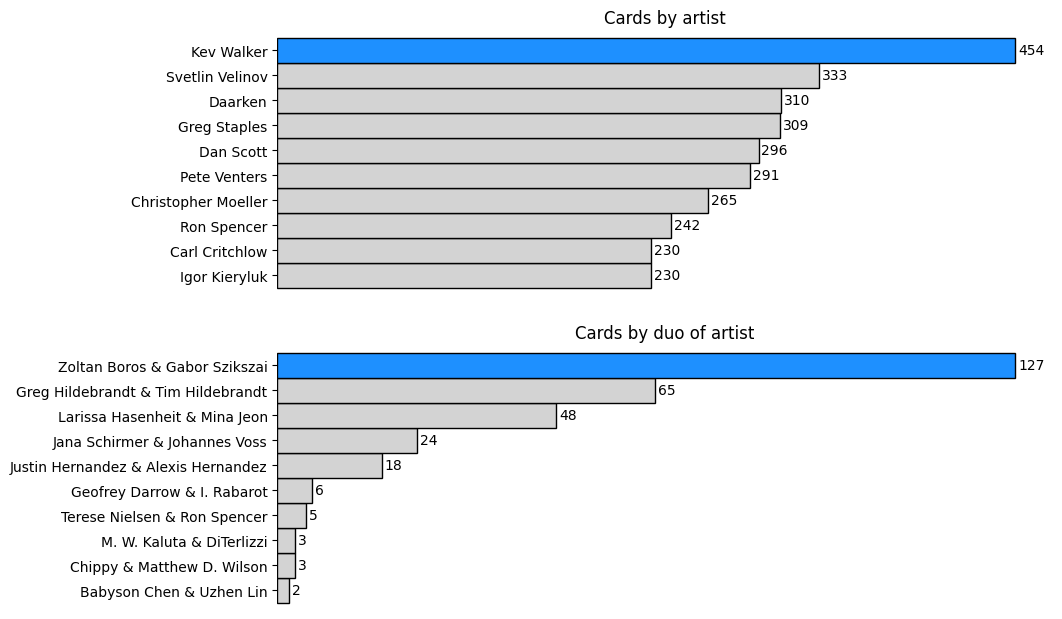

In [3]:
TOP = 10
df = default_df[["name", "artist"]].dropna().drop_duplicates()
solo = df[~df["artist"].str.contains("&")].value_counts("artist", ascending=True)[-TOP:]
duo = df[df["artist"].str.contains("&")].value_counts("artist", ascending=True)[-TOP:]

fig, axes = plt.subplots(nrows=2, figsize=(10, 7.5))
for axe in axes:
    for side in ["top", "bottom", "right", "left"]:
        axe.spines[f"{side}"].set_visible(False)

colors = ["dodgerblue" if x == 0 else "lightgrey" for x in range(TOP)][::-1]
solo_plot = solo.plot(
    ax=axes[0],
    color=colors,
    edgecolor="k",
    kind="barh",
    title="Cards by artist",
    width=1,
    ylabel="",
)
duo_plot = duo.plot(
    ax=axes[1],
    color=colors,
    edgecolor="k",
    kind="barh",
    title="Cards by duo of artist",
    width=1,
    ylabel="",
)
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.bar_label(solo_plot.containers[0], padding=2)
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.bar_label(duo_plot.containers[0], padding=2)

None  # avoid useless output

## Which cards have the most printed versions?

I expected Black Lotus to appear in the top 10, but after further inspection it's appear that Black Lotus appear inside the Reserved list.  
The Reserved list, is a list of card to never reprint in order to preserve there in the secondary market.


The Reserved list is composed of approximately 526 cards.


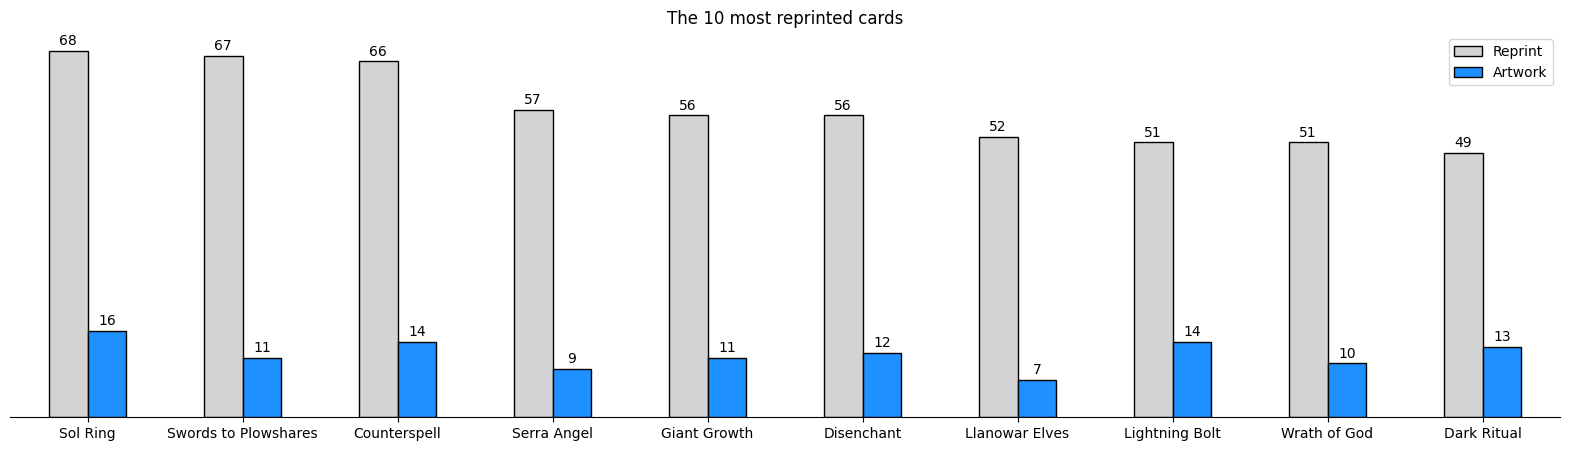

In [4]:
TOP = 10

df = default_df
df = df.loc[(df["types"] != "Land"), ["name", "scryfallIllustrationId", "isReserved"]]

reserved_count = df.drop_duplicates("name")["isReserved"].value_counts().iloc[1]
print(f"The Reserved list is composed of approximately {reserved_count} cards.")
temp = pd.DataFrame()
temp["Reprint"] = df["name"].value_counts()
temp["Artwork"] = df.drop_duplicates().groupby("name")["scryfallIllustrationId"].count()
df = temp[:TOP]

fig, axes = plt.subplots(figsize=(20, 5))
for side in ["top", "right", "left"]:
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    ax=axes,
    color={"Artwork": "dodgerblue", "Reprint": "lightgrey"},
    edgecolor="k",
    kind="bar",
    rot=0,
    title=f"The {TOP} most reprinted cards",
    xlabel="",
    ylabel="",
)
plot.tick_params("y", which="both", left=False, labelleft=False)
for container in plot.containers:
    plot.bar_label(container, padding=2)

None

## What is the proportion of original card concept ?


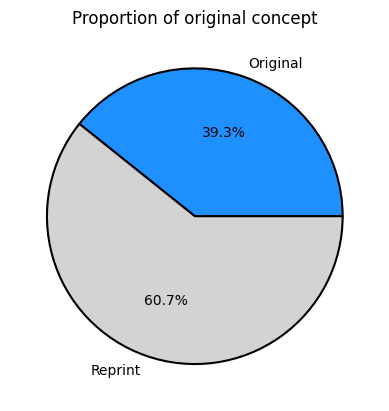

In [5]:
df = default_df

original = df[df["isReprint"] == 0].shape[0]
reprint = df[df["isReprint"] == 1].shape[0]
df = pd.Series(data={f"Original": original, f"Reprint": reprint})

plot = df.plot(
    autopct="%1.1f%%",
    colors=["dodgerblue", "lightgrey"],
    kind="pie",
    title="Proportion of original concept",
    wedgeprops={"edgecolor": "black", "linewidth": 1.5, "antialiased": True},
)

None


## What are the most used keyword abilities?

The significant difference can be explained by the fact that abilities are often "reserved" for specific colors or types of cards.  
Flying is a creature ability that is not specific to any color, which explain why it is the most represented among all the cards..


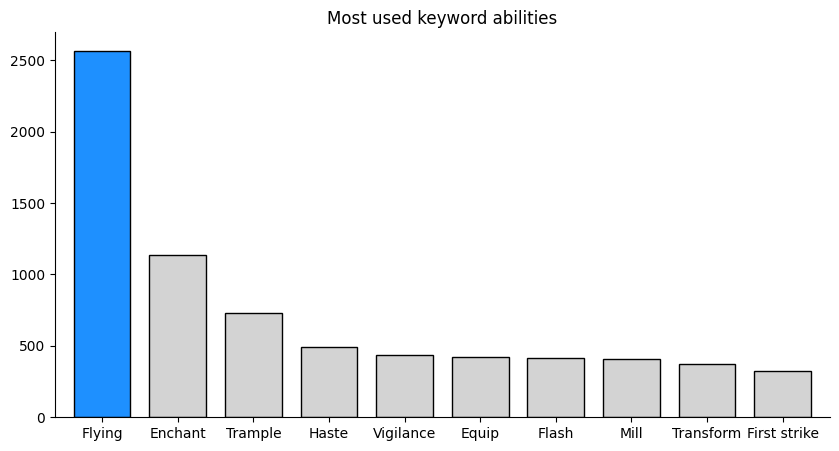

In [6]:
TOP = 10
df = default_df.drop_duplicates(["name", "side"])
df = df["keywords"].dropna()
df = df.str.split(",", expand=True).stack(dropna=True).value_counts()[:TOP]

fig, axes = plt.subplots(figsize=(10, 5))
for side in ["top", "right"]:
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    kind="bar",
    ax=axes,
    rot=0,
    width=0.75,
    edgecolor="k",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(TOP)],
    title="Most used keyword abilities",
    xlabel="",
    ylabel="",
)

None

## What are the proportion of card by type ?

I decided to concatenate the less significant portions of the pie and only display the percentages for the more important one in the plot.


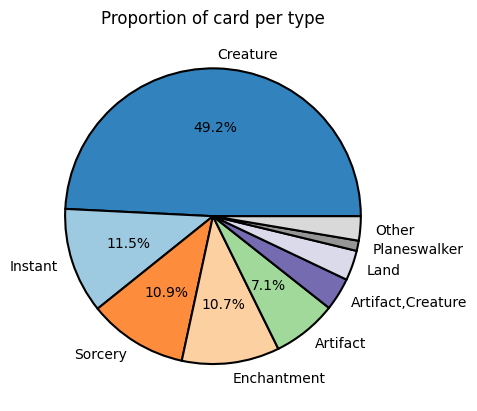

In [7]:
TOP = 8
df = default_df[["name", "types"]].drop_duplicates().dropna()

# merge the lesser values
df = df["types"].value_counts(sort=True, ascending=False)
df.iloc[TOP] = df.iloc[TOP:].sum()
df = df.iloc[: TOP + 1]
# overide the last index name
index = list(df.index)
index[-1] = "Other"
df.index = index

df.plot(
    autopct=lambda p: "{:.1f}%".format(p) if p >= 4 else "",  # hide some percentage
    colormap="tab20c",
    kind="pie",
    title="Proportion of card per type",
    wedgeprops={"edgecolor": "black", "linewidth": 1.5, "antialiased": True},
    ylabel="",
)

None